In [453]:
import pandas as pd
import numpy as np

In [454]:
data=pd.read_csv('/Users/akshatsinha/ML/data.csv')

In [455]:
data.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,F,XW0DQ7H,Village,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,No,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,F,5K0N3X1,City,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,F,1F2TCL3,Town,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,Yes,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16
3,37,M,VJGJ33N,City,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Unsolved,Poor Website,1,Basic,8,8,227,215.77,20
4,31,F,SVZXCWB,City,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,Yes,Solved,Poor Website,1,Basic,13,11,294,231.94,2


In [456]:
data.shape

(36992, 28)

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_session_duration          36992 non-null  float64
 13  a

In [458]:
data.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_session_duration               0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn                              0
plan_tier                          0
logins_90d                         0
active_days_90d                    0
api_calls_90d                      0
session_minutes_90d                0
d

In [459]:
data['churn'].value_counts()/data.shape[0]

churn
1    0.540982
0    0.459018
Name: count, dtype: float64

In [460]:
data.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn                             int64
plan_tier                        object
logins_90d                        int64
active_days_90d                   int64


In [461]:
df=data.copy()

In [462]:
def unique_values(df):
    for c in df.columns:
        if df[c].dtypes=='object':
            print(f'{c} --> {df[c].unique()}')

In [463]:
unique_values(df)

gender --> ['F' 'M' 'Unknown']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' '?' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['?' 'Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'N

In [464]:
empty_string_columns=['gender','joined_through_network','medium_of_operation']

In [465]:
df['gender']=df['gender'].replace('Unknown',df['gender'].mode()[0])
df['joined_through_referral']=df['joined_through_referral'].replace('?',df['joined_through_referral'].mode()[0])
df['medium_of_operation']=df['medium_of_operation'].replace('?',df['medium_of_operation'].mode()[0])

In [466]:
unique_values(df)

gender --> ['F' 'M']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Avai

In [467]:
yes_no_m_f_columns=['gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

In [468]:
from sklearn.preprocessing import LabelEncoder
var={}
for c in yes_no_m_f_columns:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    var[c]=le

In [469]:
df.head(3)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,0,XW0DQ7H,Village,17-08-2017,0,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,0,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,0,5K0N3X1,City,28-08-2017,0,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,1,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,0,1F2TCL3,Town,11-11-2016,1,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,1,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16


In [470]:
unique_values(df)

security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback --> ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User

In [471]:
fill_na=['region_category','preferred_offer_types']
for c in fill_na:
    df[c]=df[c].fillna(df[c].mode()[0])

<Axes: xlabel='points_in_wallet', ylabel='Density'>

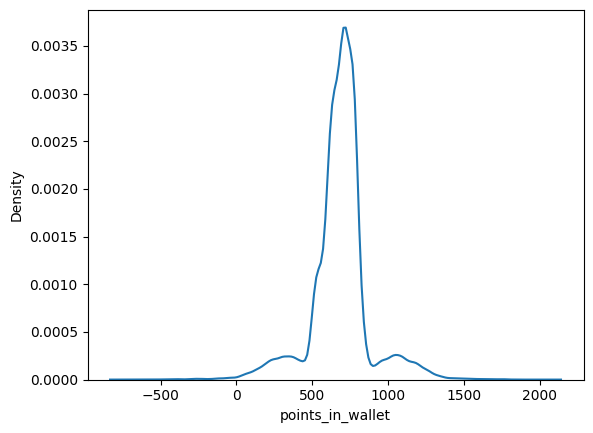

In [472]:
import seaborn as sns
sns.kdeplot(df['points_in_wallet'])

In [473]:
df['points_in_wallet'].skew()

np.float64(-0.0803091829746022)

In [474]:
df['points_in_wallet']=df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [475]:
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

<Axes: xlabel='avg_frequency_login_days', ylabel='Density'>

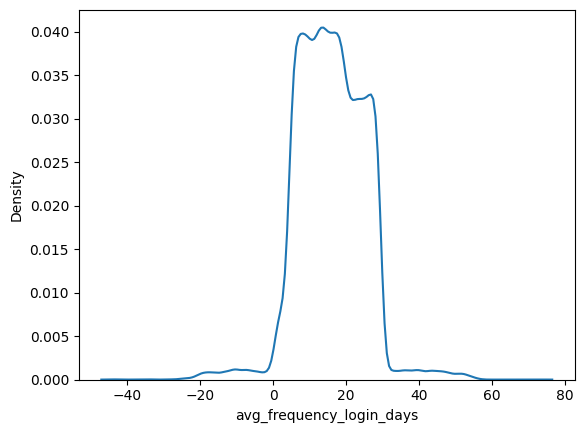

In [476]:
sns.kdeplot(df['avg_frequency_login_days'])

In [477]:
df['avg_frequency_login_days'].skew()

np.float64(0.005767066591342272)

In [478]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean())

In [479]:
to_onehot_encode=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback']

In [480]:
df1_ohe=pd.get_dummies(data=df,columns=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback'])
df1_ohe.columns

Index(['age', 'gender', 'security_no', 'joining_date',
       'joined_through_referral', 'referral_id', 'last_visit_time',
       'days_since_last_login', 'avg_session_duration',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'churn', 'logins_90d', 'active_days_90d',
       'api_calls_90d', 'session_minutes_90d', 'days_since_active',
       'region_category_City', 'region_category_Town',
       'region_category_Village',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'compla

In [481]:
df1_ohe.sample(4)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
6508,39,0,Z9ZZLZ6,29-07-2016,0,xxxxxxxx,9:07:55,17,1219.763721,37083.80,...,False,False,False,True,False,False,False,False,False,False
15450,16,1,Y7M9HBW,10-02-2017,0,xxxxxxxx,10:08:07,11,40.840000,11010.77,...,False,True,False,False,False,False,False,False,False,False
7744,52,1,V9GGODP,29-12-2016,0,xxxxxxxx,0:57:44,7,191.180000,46129.06,...,False,False,False,True,False,False,False,False,False,False
13256,47,0,YFFO9RE,14-04-2015,0,xxxxxxxx,20:41:41,17,34.100000,34973.73,...,False,False,False,True,False,False,False,False,False,False


In [482]:
for c in df1_ohe.columns:
    df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_6543/3315045924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})


In [483]:
df1_ohe.sample(3)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
21747,41,0,2MSUVPH,22-02-2016,1,CID39730,5:30:02,-999,31.29,47679.99,...,1,0,0,1,0,0,0,0,0,0
28880,37,1,Z2N4ZJO,13-02-2015,0,xxxxxxxx,15:21:00,14,265.48,32955.80,...,0,0,0,1,0,0,0,0,0,0
2779,46,0,042M1QF,14-09-2016,0,xxxxxxxx,1:21:51,16,86.37,30102.89,...,1,0,0,0,0,0,0,0,0,1


In [484]:
df2=df1_ohe.select_dtypes(include=['int64','float64'])
abs(df2.corr()['churn']).sort_values(ascending=False)

churn                                             1.000000
plan_tier_Basic                                   0.726132
api_calls_90d                                     0.659219
active_days_90d                                   0.647458
logins_90d                                        0.643144
plan_tier_Enterprise                              0.606217
session_minutes_90d                               0.524295
points_in_wallet                                  0.292793
days_since_active                                 0.273094
avg_transaction_value                             0.218012
feedback_Reasonable Price                         0.216665
feedback_User Friendly Website                    0.214590
feedback_Products always in Stock                 0.213867
feedback_Quality Customer Care                    0.212093
plan_tier_Pro                                     0.210168
avg_frequency_login_days                          0.125611
feedback_Poor Product Quality                     0.0995

In [485]:
df3_le=df.copy()
var2={}
for c in to_onehot_encode:
    le=LabelEncoder()
    df3_le[c]=le.fit_transform(df[c])
    var2[c]=le

In [486]:
df3_1=df3_le.select_dtypes(include=['int64','float64'])
abs(df3_1.corr()['churn']).sort_values(ascending=False)

churn                           1.000000
api_calls_90d                   0.659219
active_days_90d                 0.647458
logins_90d                      0.643144
plan_tier                       0.526254
session_minutes_90d             0.524295
points_in_wallet                0.292793
days_since_active               0.273094
avg_transaction_value           0.218012
feedback                        0.207723
avg_frequency_login_days        0.125611
joined_through_referral         0.028695
preferred_offer_types           0.025032
medium_of_operation             0.020011
offer_application_preference    0.018729
region_category                 0.017875
avg_session_duration            0.014263
used_special_discount           0.010648
past_complaint                  0.008934
internet_option                 0.007493
days_since_last_login           0.006228
age                             0.006124
gender                          0.004701
complaint_status                0.000114
Name: churn, dty

In [487]:
df3_le.sample(4)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
28825,43,0,GZDERC4,0,05-04-2017,1,CID9647,1,1,1,...,1,4,7,0,2,26,26,1400,512.32,0
435,51,1,WFN7EE1,1,28-10-2017,1,xxxxxxxx,0,1,1,...,0,1,4,0,1,50,39,9511,1461.90,0
33866,24,0,UXNAAM9,0,15-05-2017,0,CID53649,0,1,2,...,1,3,2,1,0,14,14,246,227.06,5
19054,15,1,6NCVZE6,1,31-07-2017,0,xxxxxxxx,2,1,2,...,0,1,0,1,2,22,19,1468,362.63,1


In [488]:
df.select_dtypes(include=['int64','float64']).describe()

,age,gender,joined_through_referral,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,0.498567,0.424822,-41.915576,243.472334,29271.194003,15.976715,686.882199,0.549903,0.552552,0.497135,0.540982,24.013057,20.428795,3223.677849,524.694113,4.312203
std,15.867412,0.500005,0.494323,228.819900,398.289149,19444.806226,8.766154,184.811682,0.497510,0.497237,0.499999,0.498324,12.778238,9.473876,4060.336858,345.090190,5.781831
min,10.000000,0.000000,0.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,171.000000,5.400000,0.000000
25%,23.000000,0.000000,0.000000,8.000000,60.102500,14177.540000,10.000000,624.350000,0.000000,0.000000,0.000000,0.000000,14.000000,13.000000,346.000000,266.135000,1.000000
50%,37.000000,0.000000,0.000000,12.000000,161.765000,27554.485000,15.976715,686.882199,1.000000,1.000000,0.000000,1.000000,21.000000,19.000000,1626.000000,432.570000,2.000000
75%,51.000000,1.000000,1.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000,1.000000,1.000000,1.000000,32.000000,27.000000,2967.000000,707.270000,6.000000
max,64.000000,1.000000,1.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,1.000000,75.000000,54.000000,18776.000000,2192.280000,78.000000


In [489]:
to_scale=['age','days_since_last_login','avg_session_duration','avg_transaction_value','avg_frequency_login_days','points_in_wallet','logins_90d','active_days_90d','api_calls_90d','session_minutes_90d','days_since_active']

In [490]:
df[to_scale].dtypes

age                           int64
days_since_last_login         int64
avg_session_duration        float64
avg_transaction_value       float64
avg_frequency_login_days    float64
points_in_wallet            float64
logins_90d                    int64
active_days_90d               int64
api_calls_90d                 int64
session_minutes_90d         float64
days_since_active             int64
dtype: object

In [491]:
from sklearn.preprocessing import StandardScaler
def std_scaler(df,to_scale):
    std=StandardScaler()
    df[to_scale]=std.fit_transform(df[to_scale])

In [492]:
std_scaler(df,to_scale)

In [493]:
from sklearn.preprocessing import MinMaxScaler
def norm_scaler(df,to_scale):
    min_max_scaler=MinMaxScaler()
    df[to_scale]=min_max_scaler.fit_transform(df[to_scale])

In [494]:
norm_scaler(df1_ohe,to_scale)

In [495]:
df1_ohe.head(5)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.148148,0,XW0DQ7H,17-08-2017,0,xxxxxxxx,16:08:02,0.991220,0.514859,0.526717,...,0,0,0,0,0,1,0,0,0,0
1,0.407407,0,5K0N3X1,28-08-2017,0,CID21329,12:38:13,0.990244,0.515803,0.121456,...,0,0,0,0,0,0,1,0,0,0
2,0.629630,0,1F2TCL3,11-11-2016,1,CID12313,22:53:21,0.988293,0.550486,0.204074,...,0,0,0,0,1,0,0,0,0,0
3,0.500000,1,VJGJ33N,29-10-2016,1,CID3793,15:57:50,0.985366,0.473971,0.246577,...,0,0,0,0,1,0,0,0,0,0
4,0.388889,0,SVZXCWB,12-09-2017,0,xxxxxxxx,15:46:44,0.994146,0.483866,0.238950,...,0,0,0,0,1,0,0,0,0,0


In [496]:
df1_ohe.dtypes

age                                               float64
gender                                              int64
security_no                                        object
joining_date                                       object
joined_through_referral                             int64
referral_id                                        object
last_visit_time                                    object
days_since_last_login                             float64
avg_session_duration                              float64
avg_transaction_value                             float64
avg_frequency_login_days                          float64
points_in_wallet                                  float64
used_special_discount                               int64
offer_application_preference                        int64
past_complaint                                      int64
churn                                               int64
logins_90d                                        float64
active_days_90

In [497]:
norm_scaler(df3_le,to_scale)

In [498]:
df3_le.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,0.148148,0,XW0DQ7H,2,17-08-2017,0,xxxxxxxx,1,1,2,...,0,1,4,0,1,0.608108,0.603774,0.463424,0.467200,0.025641
1,0.407407,0,5K0N3X1,0,28-08-2017,0,CID21329,1,1,1,...,1,2,5,0,1,0.486486,0.547170,0.453319,0.391997,0.012821
2,0.629630,0,1F2TCL3,1,11-11-2016,1,CID12313,1,1,2,...,1,3,3,1,0,0.216216,0.301887,0.005160,0.185639,0.205128
3,0.500000,1,VJGJ33N,0,29-10-2016,1,CID3793,1,1,1,...,1,4,3,1,0,0.094595,0.132075,0.003010,0.096196,0.256410
4,0.388889,0,SVZXCWB,0,12-09-2017,0,xxxxxxxx,0,2,1,...,1,2,3,1,0,0.162162,0.188679,0.006611,0.103591,0.025641


In [499]:
df3_le.dtypes

age                             float64
gender                            int64
security_no                      object
region_category                   int64
joining_date                     object
joined_through_referral           int64
referral_id                      object
preferred_offer_types             int64
medium_of_operation               int64
internet_option                   int64
last_visit_time                  object
days_since_last_login           float64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount             int64
offer_application_preference      int64
past_complaint                    int64
complaint_status                  int64
feedback                          int64
churn                             int64
plan_tier                         int64
logins_90d                      float64
active_days_90d                 float64


In [507]:
input_data1=df1_ohe.copy()
input_data2=df3_le.copy()

In [508]:
input_data1=input_data1.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])
input_data2=input_data2.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])